# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Learning Outcomes

* Design and build a simulation environment that models sensor inputs, actuator effects, and performance measurement.
* Apply core AI concepts by implementing the agent function for a simple and model-based reflex agents that respond to environmental percepts.
* Practice how the environment and the agent function interact.
* Analyze agent performance through controlled experiments across different environment configurations.
* Graduate Students: Develop strategies for handling uncertainty and imperfect information in autonomous agent systems.

## Instructions

Total Points: Undergrads 98 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file. 

### AI Use

Here are some guidelines that will make it easier for you:

* __Don't:__ Rely on AI auto completion. You will waste a lot of time trying to figure out how the suggested code relates to what we do in class. Turn off AI code completion (e.g., Copilot) in your IDE.
* __Don't:__ Do not submit code/text that you do not understand or have not checked to make sure that it is complete and correct.
* __Do:__ Use AI for debugging and letting it explain code and concepts from class.

### Using Visual Studio Code

If you use VS code then you can use `Export` (click on `...` in the menu bar) to save your notebook as a HTML file. Note that you have to run all blocks before so the HTML file contains your output.

### Using Google Colab

In Colab you need to save the notebook on GoogleDrive to work with it. For this you need to mount your google dive and change to the correct directory by uncommenting the following lines and running the code block.

In [20]:
# from google.colab import drive
# import os
#
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/Colab Notebooks/')

Once you are done with the assignment and have run all code blocks using `Runtime/Run all`, you can convert the file on your GoogleDrive into HTML be uncommenting the following line and running the block.

In [21]:
# %jupyter nbconvert --to html Copy\ of\ robot_vacuum.ipynb

You may have to fix the file location or the file name to match how it looks on your GoogleDrive. You can navigate in Colab to your GoogleDrive using the little folder symbol in the navigation bar to the left.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [1]:
# make sure numpy is installed
%pip install -q numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [3]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'suck'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`. 

In [4]:
def simple_environment(agent_function, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent_function(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [9]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: west
step 1 - action: suck
step 2 - action: north
step 3 - action: east
step 4 - action: suck
step 5 - action: south
step 6 - action: suck
step 7 - action: south
step 8 - action: west
step 9 - action: east
step 10 - action: south
step 11 - action: south
step 12 - action: east
step 13 - action: suck
step 14 - action: south
step 15 - action: north
step 16 - action: north
step 17 - action: suck
step 18 - action: suck
step 19 - action: west


6

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [12]:
# Your code and description goes here
import numpy as np
import random

class VacuumEnvironment:
    def __init__(self, width=2, height=2, dirt_prob=0.5, max_steps=50):
        """
        width, height: kích thước phòng
        dirt_prob: xác suất một ô ban đầu là bẩn
        max_steps: số bước tối đa robot được chạy
        """
        self.width = width
        self.height = height
        self.max_steps = max_steps

        # Khởi tạo phòng: Clean hoặc Dirty
        self.room = np.where(
            np.random.rand(height, width) < dirt_prob, "Dirty", "Clean"
        )

        # Đặt vị trí ban đầu ngẫu nhiên cho robot
        self.agent_pos = [random.randint(0, height-1), random.randint(0, width-1)]

        # Hiệu suất
        self.performance = 0
        self.steps = 0

    def percept(self):
        """Trả về (vị trí hiện tại, trạng thái ô hiện tại)"""
        y, x = self.agent_pos
        return (tuple(self.agent_pos), self.room[y, x])

    def execute(self, action):
        """Thực thi hành động từ agent"""
        y, x = self.agent_pos

        if action == "Suck":
            if self.room[y, x] == "Dirty":
                self.room[y, x] = "Clean"
                self.performance += 10
        elif action == "Up" and y > 0:
            self.agent_pos[0] -= 1
            self.performance -= 1
        elif action == "Down" and y < self.height - 1:
            self.agent_pos[0] += 1
            self.performance -= 1
        elif action == "Left" and x > 0:
            self.agent_pos[1] -= 1
            self.performance -= 1
        elif action == "Right" and x < self.width - 1:
            self.agent_pos[1] += 1
            self.performance -= 1
        elif action == "NoOp":
            self.performance -= 0
        else:
            # Nếu va vào tường hoặc hành động sai → phạt
            self.performance -= 2

        # Trừ điểm theo thời gian
        self.performance -= 1
        self.steps += 1

    def is_done(self):
        """Dừng khi tất cả ô sạch hoặc hết bước"""
        return np.all(self.room == "Clean") or self.steps >= self.max_steps

    def display(self):
        """In trạng thái phòng và vị trí robot"""
        room_copy = self.room.copy().astype(object)
        y, x = self.agent_pos
        room_copy[y, x] = "🤖"
        print(room_copy)

    def run(self, agent_fn, verbose=True):
        """Chạy mô phỏng với agent"""
        while not self.is_done():
            percept = self.percept()
            action = agent_fn(percept)
            if verbose:
                print(f"Step {self.steps}: Percept={percept}, Action={action}")
                self.display()
            self.execute(action)

        if verbose:
            print(f"Final performance: {self.performance}")
        return self.performance


Show that your environment works with the simple randomized agent from above.

In [13]:
# Your code and description goes here
# Agent phản xạ đơn giản: nếu bẩn thì hút, nếu sạch thì di chuyển ngẫu nhiên
def random_agent(percept):
    pos, status = percept
    if status == "Dirty":
        return "Suck"
    return random.choice(["Up", "Down", "Left", "Right", "NoOp"])

# Tạo môi trường 2x2 và chạy
env = VacuumEnvironment(width=2, height=2, dirt_prob=0.7, max_steps=20)
env.run(random_agent, verbose=True)


Step 0: Percept=((1, 1), 'Clean'), Action=NoOp
[['Dirty' 'Dirty']
 ['Dirty' '🤖']]
Step 1: Percept=((1, 1), 'Clean'), Action=Down
[['Dirty' 'Dirty']
 ['Dirty' '🤖']]
Step 2: Percept=((1, 1), 'Clean'), Action=Down
[['Dirty' 'Dirty']
 ['Dirty' '🤖']]
Step 3: Percept=((1, 1), 'Clean'), Action=Down
[['Dirty' 'Dirty']
 ['Dirty' '🤖']]
Step 4: Percept=((1, 1), 'Clean'), Action=Down
[['Dirty' 'Dirty']
 ['Dirty' '🤖']]
Step 5: Percept=((1, 1), 'Clean'), Action=NoOp
[['Dirty' 'Dirty']
 ['Dirty' '🤖']]
Step 6: Percept=((1, 1), 'Clean'), Action=Up
[['Dirty' 'Dirty']
 ['Dirty' '🤖']]
Step 7: Percept=((0, 1), 'Dirty'), Action=Suck
[['Dirty' '🤖']
 ['Dirty' 'Clean']]
Step 8: Percept=((0, 1), 'Clean'), Action=Left
[['Dirty' '🤖']
 ['Dirty' 'Clean']]
Step 9: Percept=((0, 0), 'Dirty'), Action=Suck
[['🤖' 'Clean']
 ['Dirty' 'Clean']]
Step 10: Percept=((0, 0), 'Clean'), Action=NoOp
[['🤖' 'Clean']
 ['Dirty' 'Clean']]
Step 11: Percept=((0, 0), 'Clean'), Action=Left
[['🤖' 'Clean']
 ['Dirty' 'Clean']]
Step 12: Percept

2

## Task 2:  Implement a simple reflex agent [10 Points] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

In [16]:
# Task 2: Simple Reflex Agent
def simple_reflex_agent(percept):
    """
    Simple reflex agent:
    - Nếu ô hiện tại bẩn -> hút bụi ("Suck").
    - Nếu sạch -> chọn ngẫu nhiên 1 hành động trong [Up, Down, Left, Right, NoOp].
    - Va chạm tường (bumper) sẽ do environment xử lý bằng cách không cho di chuyển hoặc phạt điểm.
    """
    pos, status = percept
    if status == "Dirty":
        return "Suck"
    return random.choice(["Up", "Down", "Left", "Right", "NoOp"])


# Chạy thử trong môi trường 2x2
env = VacuumEnvironment(width=2, height=2, dirt_prob=0.8, max_steps=10)
performance = env.run(simple_reflex_agent, verbose=True)

print("Final performance:", performance)


Step 0: Percept=((1, 1), 'Dirty'), Action=Suck
[['Dirty' 'Clean']
 ['Clean' '🤖']]
Step 1: Percept=((1, 1), 'Clean'), Action=NoOp
[['Dirty' 'Clean']
 ['Clean' '🤖']]
Step 2: Percept=((1, 1), 'Clean'), Action=Up
[['Dirty' 'Clean']
 ['Clean' '🤖']]
Step 3: Percept=((0, 1), 'Clean'), Action=Up
[['Dirty' '🤖']
 ['Clean' 'Clean']]
Step 4: Percept=((0, 1), 'Clean'), Action=Down
[['Dirty' '🤖']
 ['Clean' 'Clean']]
Step 5: Percept=((1, 1), 'Clean'), Action=Down
[['Dirty' 'Clean']
 ['Clean' '🤖']]
Step 6: Percept=((1, 1), 'Clean'), Action=Right
[['Dirty' 'Clean']
 ['Clean' '🤖']]
Step 7: Percept=((1, 1), 'Clean'), Action=NoOp
[['Dirty' 'Clean']
 ['Clean' '🤖']]
Step 8: Percept=((1, 1), 'Clean'), Action=Up
[['Dirty' 'Clean']
 ['Clean' '🤖']]
Step 9: Percept=((0, 1), 'Clean'), Action=Left
[['Dirty' '🤖']
 ['Clean' 'Clean']]
Final performance: -10
Final performance: -10


Show how the agent works with your environment.

In [17]:
# Your code and description goes here
# Tạo môi trường 2x2, khởi tạo nhiều ô bẩn để dễ quan sát
env = VacuumEnvironment(width=5, height=4, dirt_prob=0.8, max_steps=10)

# Chạy môi trường với simple_reflex_agent
performance = env.run(simple_reflex_agent, verbose=True)

print("Final performance:", performance)



Step 0: Percept=((2, 4), 'Clean'), Action=Left
[['Clean' 'Dirty' 'Clean' 'Dirty' 'Dirty']
 ['Dirty' 'Dirty' 'Dirty' 'Dirty' 'Dirty']
 ['Dirty' 'Dirty' 'Dirty' 'Clean' '🤖']
 ['Dirty' 'Clean' 'Clean' 'Clean' 'Dirty']]
Step 1: Percept=((2, 3), 'Clean'), Action=NoOp
[['Clean' 'Dirty' 'Clean' 'Dirty' 'Dirty']
 ['Dirty' 'Dirty' 'Dirty' 'Dirty' 'Dirty']
 ['Dirty' 'Dirty' 'Dirty' '🤖' 'Clean']
 ['Dirty' 'Clean' 'Clean' 'Clean' 'Dirty']]
Step 2: Percept=((2, 3), 'Clean'), Action=Right
[['Clean' 'Dirty' 'Clean' 'Dirty' 'Dirty']
 ['Dirty' 'Dirty' 'Dirty' 'Dirty' 'Dirty']
 ['Dirty' 'Dirty' 'Dirty' '🤖' 'Clean']
 ['Dirty' 'Clean' 'Clean' 'Clean' 'Dirty']]
Step 3: Percept=((2, 4), 'Clean'), Action=Up
[['Clean' 'Dirty' 'Clean' 'Dirty' 'Dirty']
 ['Dirty' 'Dirty' 'Dirty' 'Dirty' 'Dirty']
 ['Dirty' 'Dirty' 'Dirty' 'Clean' '🤖']
 ['Dirty' 'Clean' 'Clean' 'Clean' 'Dirty']]
Step 4: Percept=((1, 4), 'Dirty'), Action=Suck
[['Clean' 'Dirty' 'Clean' 'Dirty' 'Dirty']
 ['Dirty' 'Dirty' 'Dirty' 'Dirty' '🤖']
 ['Dirty

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [ ]:
# Your short description of the state and your implementation goes here
# The agent state is stored as a dictionary that remembers the cleanliness
# status of each cell in the environment.
# - Key: (row, col) coordinate
# - Value: "Clean", "Dirty", or None (if not yet visited)
#
# The agent updates this memory whenever it perceives the current location.
# Rules:
# - If current cell is Dirty => Suck
# - Else if all known cells are Clean => NoOp
# - Else move to a neighboring cell, preferring unknown or Dirty ones.

In [ ]:
# Your code goes here
def model_based_agent_fn(env_width, env_height):
    """
    Model-based reflex agent with memory of visited cells.
    """
    memory = {(y, x): None for y in range(env_height) for x in range(env_width)}

    def agent(percept):
        pos, status = percept
        # update memory
        memory[pos] = status

        # Rule 1: clean if dirty
        if status == "Dirty":
            return "Suck"

        # Rule 2: stop if everything known is clean
        if all(v == "Clean" for v in memory.values() if v is not None):
            return "NoOp"

        # Rule 3: move towards unknown or Dirty neighbors
        y, x = pos
        neighbors = []
        if y > 0: neighbors.append(("Up", (y-1, x)))
        if y < env_height-1: neighbors.append(("Down", (y+1, x)))
        if x > 0: neighbors.append(("Left", (y, x-1)))
        if x < env_width-1: neighbors.append(("Right", (y, x+1)))

        unexplored = [move for move, loc in neighbors if memory[loc] != "Clean"]
        if unexplored:
            return random.choice(unexplored)[0]
        # Rule 4: otherwise NoOp
        return "NoOp"
    return agent


Show how the agent works with your environment.

In [20]:
# Your code goes here
# Create environment 2x2 with some dirt
env = VacuumEnvironment(width=2, height=2, dirt_prob=0.8, max_steps=15)

# Create and run model-based agent
agent = model_based_agent_fn(env.width, env.height)
performance = env.run(agent, verbose=True)

print("Final performance (Model-Based Agent):", performance)


Step 0: Percept=((0, 0), 'Dirty'), Action=Suck
[['🤖' 'Dirty']
 ['Clean' 'Dirty']]
Step 1: Percept=((0, 0), 'Clean'), Action=NoOp
[['🤖' 'Dirty']
 ['Clean' 'Dirty']]
Step 2: Percept=((0, 0), 'Clean'), Action=NoOp
[['🤖' 'Dirty']
 ['Clean' 'Dirty']]
Step 3: Percept=((0, 0), 'Clean'), Action=NoOp
[['🤖' 'Dirty']
 ['Clean' 'Dirty']]
Step 4: Percept=((0, 0), 'Clean'), Action=NoOp
[['🤖' 'Dirty']
 ['Clean' 'Dirty']]
Step 5: Percept=((0, 0), 'Clean'), Action=NoOp
[['🤖' 'Dirty']
 ['Clean' 'Dirty']]
Step 6: Percept=((0, 0), 'Clean'), Action=NoOp
[['🤖' 'Dirty']
 ['Clean' 'Dirty']]
Step 7: Percept=((0, 0), 'Clean'), Action=NoOp
[['🤖' 'Dirty']
 ['Clean' 'Dirty']]
Step 8: Percept=((0, 0), 'Clean'), Action=NoOp
[['🤖' 'Dirty']
 ['Clean' 'Dirty']]
Step 9: Percept=((0, 0), 'Clean'), Action=NoOp
[['🤖' 'Dirty']
 ['Clean' 'Dirty']]
Step 10: Percept=((0, 0), 'Clean'), Action=NoOp
[['🤖' 'Dirty']
 ['Clean' 'Dirty']]
Step 11: Percept=((0, 0), 'Clean'), Action=NoOp
[['🤖' 'Dirty']
 ['Clean' 'Dirty']]
Step 12: Perce

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. Do at least $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [23]:
# Your code goes here
import numpy as np
import matplotlib.pyplot as plt

def evaluate_agent(agent_fn, width, height, runs=100, max_steps=200):
    scores = []
    for _ in range(runs):
        env = VacuumEnvironment(width=width, height=height, dirt_prob=0.5, max_steps=max_steps)
        if agent_fn == model_based_agent_fn:
            agent = model_based_agent_fn(width, height)
        else:
            agent = agent_fn
        scores.append(env.run(agent, verbose=False))
    return np.mean(scores)

# Danh sách agent
agents = {
    "Randomized Agent": random_agent,
    "Simple Reflex Agent": simple_reflex_agent,
    "Model-based Reflex Agent": model_based_agent_fn
}

sizes = [(5,5), (10,10), (100,100)]

results = {}
for w,h in sizes:
    results[(w,h)] = {}
    for name, agent_fn in agents.items():
        avg_score = evaluate_agent(agent_fn, w, h, runs=100, max_steps=w*h*2)
        results[(w,h)][name] = avg_score

results



{(5, 5): {'Randomized Agent': -30.15,
  'Simple Reflex Agent': -31.21,
  'Model-based Reflex Agent': -45.4},
 (10, 10): {'Randomized Agent': -134.69,
  'Simple Reflex Agent': -132.25,
  'Model-based Reflex Agent': -194.7},
 (100, 100): {'Randomized Agent': -18636.76,
  'Simple Reflex Agent': -19476.54,
  'Model-based Reflex Agent': -19994.5}}

Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

         Randomized Agent  Simple Reflex Agent  Model-based Reflex Agent
5x5                -30.15               -31.21                     -45.4
10x10             -134.69              -132.25                    -194.7
100x100         -18636.76            -19476.54                  -19994.5


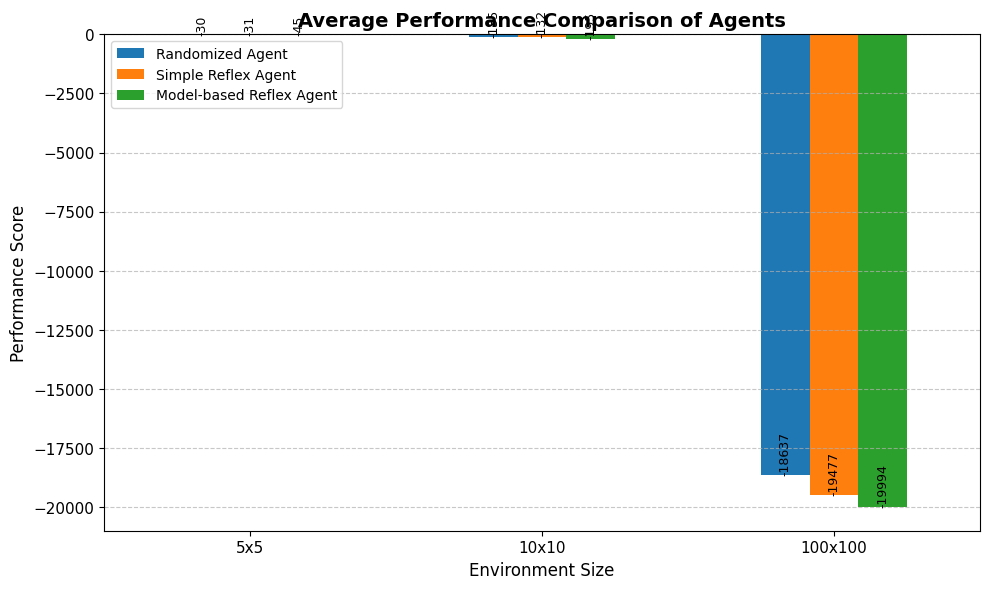

In [28]:
# Your graphs and discussion of the results goes here
import pandas as pd

# Tạo DataFrame từ results
df = pd.DataFrame(results).T
df.index = [f"{w}x{h}" for (w,h) in df.index]
df = df[["Randomized Agent", "Simple Reflex Agent", "Model-based Reflex Agent"]]
print(df)

ax = df.plot(kind="bar", figsize=(10,6))
plt.title("Average Performance Comparison of Agents", fontsize=14, weight="bold")
plt.ylabel("Performance Score", fontsize=12)
plt.xlabel("Environment Size", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)

# Hiển thị grid để dễ so sánh
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Hiển thị giá trị lên trên cột
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", fontsize=9, rotation=90)

plt.tight_layout()
plt.show()



## Task 5: Robustness of the agent implementations [10 Points] 

Describe how **your agent implementations** will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

In [ ]:
# Answers goes here
### Robustness of the agent implementations

# 1. Rectangular room with unknown size**
# - Randomized Agent: vẫn hoạt động được nhưng sẽ di chuyển lang thang và có thể bỏ sót một số ô, hiệu suất thấp.
# - Simple Reflex Agent: sẽ dọn được khi gặp ô bẩn, nhưng không có chiến lược quét toàn bộ → dễ bỏ sót khi phòng quá lớn.
# - Model-based Reflex Agent: mạnh nhất, vì giữ trạng thái các ô đã thăm, có thể bao phủ toàn bộ phòng kể cả khi kích thước chưa biết.

# **2. Irregular shaped area (e.g., hallway connecting rooms)**
# - Randomized Agent: có thể đi vào hành lang ngẫu nhiên, nhưng không chắc sẽ dọn hết.
# - Simple Reflex Agent: không nhận thức được hình dạng phòng, nên vẫn phụ thuộc vào di chuyển ngẫu nhiên.
# - Model-based Reflex Agent: nhờ lưu lại trạng thái, có thể khám phá toàn bộ hình dạng bất quy tắc tốt hơn.

# **3. Room with obstacles (squares not passable)**
# - Randomized Agent: sẽ liên tục va chạm vào vật cản, lãng phí bước.
# - Simple Reflex Agent: dùng bumper sensor để tránh vật cản, nhưng vẫn kém hiệu quả vì không nhớ chỗ đã thử.
# - Model-based Reflex Agent: có thể học/ghi nhớ vị trí vật cản và tìm đường khác → bao phủ tốt hơn.

# **4. Dirt sensor imperfect (10% error)**
# - Randomized Agent: có thể bỏ sót bụi hoặc hút nhầm chỗ sạch, nhưng vì đi ngẫu nhiên nên vẫn có xác suất dọn lại đúng.
# - Simple Reflex Agent: dễ bị lừa bởi lỗi sensor, đôi khi bỏ sót bụi.
# - Model-based Reflex Agent: bền vững hơn, vì có thể quay lại các ô sau và phát hiện bụi ở lần đọc khác.

# **5. Bumper sensor imperfect (10% miss)**
# - Randomized Agent: có thể đi xuyên vào tường nếu bumper không báo → lỗi nặng.
# - Simple Reflex Agent: tương tự, dễ mắc kẹt do tin sai vào bumper.
# - Model-based Reflex Agent: có thể phát hiện inconsistency (ví dụ robot không di chuyển được như mong đợi) và cập nhật lại bản đồ → xử lý tốt hơn.


SyntaxError: invalid character '→' (U+2192) (1195993125.py, line 6)

## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares. 

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

In [31]:
# Advanced Task: Imperfect Dirt Sensor

import numpy as np, random, pandas as pd, matplotlib.pyplot as plt

# 1. Noisy environment (dirt sensor has 10% chance to flip)
class NoisyVacuumEnvironment:
    def __init__(self, width=5, height=5, dirt_prob=0.5, max_steps=500, sensor_error=0.1):
        self.width, self.height, self.max_steps, self.sensor_error = width, height, max_steps, sensor_error
        self.room = np.where(np.random.rand(height, width) < dirt_prob, "Dirty", "Clean")
        self.agent_pos = [random.randint(0, height-1), random.randint(0, width-1)]
        self.performance, self.steps = 0, 0

    def percept(self):
        y, x = self.agent_pos
        true_status = self.room[y, x]
        if random.random() < self.sensor_error:  # flip with prob=10%
            noisy = "Dirty" if true_status == "Clean" else "Clean"
        else:
            noisy = true_status
        return (tuple(self.agent_pos), noisy)

    def execute(self, action):
        y, x = self.agent_pos
        if action == "Suck":
            if self.room[y, x] == "Dirty":
                self.room[y, x] = "Clean"
                self.performance += 10
        elif action == "Up" and y > 0:   self.agent_pos[0] -= 1; self.performance -= 1
        elif action == "Down" and y < self.height-1: self.agent_pos[0] += 1; self.performance -= 1
        elif action == "Left" and x > 0: self.agent_pos[1] -= 1; self.performance -= 1
        elif action == "Right" and x < self.width-1: self.agent_pos[1] += 1; self.performance -= 1
        else: self.performance -= 2  # bump or invalid
        self.performance -= 1
        self.steps += 1

    def is_done(self):
        return np.all(self.room == "Clean") or self.steps >= self.max_steps

    def run(self, agent_fn):
        while not self.is_done():
            percept = self.percept()
            action = agent_fn(percept)
            self.execute(action)
        return self.performance, int(np.sum(self.room == "Dirty"))


# 2. Agents
def noisy_random_agent(percept):
    pos, status = percept
    if status == "Dirty": return "Suck"
    return random.choice(["Up","Down","Left","Right","NoOp"])

def noisy_simple_reflex(percept):
    pos, status = percept
    if status == "Dirty": return "Suck"
    return random.choice(["Up","Down","Left","Right","NoOp"])

def noisy_model_based_factory(width, height):
    memory = {(y,x): None for y in range(height) for x in range(width)}
    def agent(percept):
        pos, status = percept
        memory[pos] = status  # store noisy percept
        if status == "Dirty": return "Suck"
        if all(v == "Clean" for v in memory.values() if v is not None): return "NoOp"
        y,x = pos
        neighbors = []
        if y>0: neighbors.append(("Up",(y-1,x)))
        if y<height-1: neighbors.append(("Down",(y+1,x)))
        if x>0: neighbors.append(("Left",(y,x-1)))
        if x<width-1: neighbors.append(("Right",(y,x+1)))
        cand = [m for m,loc in neighbors if memory[loc] != "Clean"]
        return random.choice(cand) if cand else "NoOp"
    return agent

# Improved model-based: require 2 consecutive "Clean" to mark known_clean
def improved_model_based_factory(width, height, confirm_clean=2):
    clean_counts = {(y,x):0 for y in range(height) for x in range(width)}
    known_clean  = {(y,x):False for y in range(height) for x in range(width)}
    def agent(percept):
        pos, status = percept
        if status == "Clean": clean_counts[pos] += 1
        else: clean_counts[pos] = 0
        if clean_counts[pos] >= confirm_clean: known_clean[pos] = True
        if status == "Dirty": return "Suck"
        if all(known_clean.values()): return "NoOp"
        y,x = pos
        neighbors = []
        if y>0: neighbors.append(("Up",(y-1,x)))
        if y<height-1: neighbors.append(("Down",(y+1,x)))
        if x>0: neighbors.append(("Left",(y,x-1)))
        if x<width-1: neighbors.append(("Right",(y,x+1)))
        cand = [m for m,loc in neighbors if not known_clean[loc]]
        return random.choice(cand) if cand else random.choice(["Up","Down","Left","Right"])
    return agent


# 3. Experiment runner
def experiment(width, height, runs=20, sensor_error=0.1):
    agents = {
        "Random": noisy_random_agent,
        "SimpleReflex": noisy_simple_reflex,
        "ModelBaseline": noisy_model_based_factory(width, height),
        "ModelImproved": improved_model_based_factory(width, height, confirm_clean=2)
    }
    results = {name: {"perf":[], "dirty":[]} for name in agents}
    for _ in range(runs):
        for name, agent in agents.items():
            env = NoisyVacuumEnvironment(width, height, dirt_prob=0.5,
                                         max_steps=width*height*3,
                                         sensor_error=sensor_error)
            perf, left = env.run(agent)
            results[name]["perf"].append(perf)
            results[name]["dirty"].append(left)
    summary = {name:{
        "avg_perf": np.mean(v["perf"]),
        "avg_left_dirty": np.mean(v["dirty"])
    } for name,v in results.items()}
    return pd.DataFrame(summary).T

# 4. Run experiments on 5x5 and 10x10
df5  = experiment(5,5, runs=30)
df10 = experiment(10,10, runs=20)

print("5x5 with noisy sensor:")
display(df5)
print("\n10x10 with noisy sensor:")
display(df10)


5x5 with noisy sensor:


,avg_perf,avg_left_dirty
Random,-91.466667,5.800000
SimpleReflex,-73.933333,4.400000
ModelBaseline,-200.700000,11.833333
ModelImproved,-187.633333,10.733333



10x10 with noisy sensor:


,avg_perf,avg_left_dirty
Random,-355.20,22.80
SimpleReflex,-359.25,24.75
ModelBaseline,-814.70,49.85
ModelImproved,-776.15,45.60


## More Advanced Implementation (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment. We will learn implementation strategies and algorithms useful for these tasks during the rest of the semester.

* __Obstacles:__ Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Perform experiments to observe how this changes the performance of the three implementations. Describe what would need to be done to perform better with obstacles. Add code if you can. 

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [33]:
# Your ideas/code
#1 Môi trường với obstacles
import numpy as np, random
from collections import deque

class ObstacleVacuumEnvironment:
    """
    Environment with rectangular grid, dirt and obstacles.
    - obstacles: boolean array shape (h,w) True = blocked
    - agent cannot enter obstacles; attempting to will cause bump penalty.
    """
    def __init__(self, width=5, height=5, dirt_prob=0.5, obstacle_prob=0.1, max_steps=None):
        self.width = width
        self.height = height
        self.max_steps = max_steps if max_steps is not None else width*height*5
        self.room = np.where(np.random.rand(height, width) < dirt_prob, "Dirty", "Clean")
        # place obstacles (ensure agent cell is not obstacle)
        self.obstacles = np.random.rand(height, width) < obstacle_prob
        # pick start pos not on obstacle
        while True:
            y, x = random.randint(0, height-1), random.randint(0, width-1)
            if not self.obstacles[y,x]:
                self.agent_pos = [y,x]
                break
        self.obstacles[self.agent_pos[0], self.agent_pos[1]] = False
        self.performance = 0
        self.steps = 0

    def percept(self):
        y,x = self.agent_pos
        return (tuple(self.agent_pos), self.room[y,x])

    def can_move_to(self, ny, nx):
        if not (0 <= ny < self.height and 0 <= nx < self.width): 
            return False
        if self.obstacles[ny, nx]:
            return False
        return True

    def execute(self, action):
        y, x = self.agent_pos
        if action == "Suck":
            if self.room[y,x] == "Dirty":
                self.room[y,x] = "Clean"
                self.performance += 10
        else:
            # map action to delta
            delta = {"Up":(-1,0), "Down":(1,0), "Left":(0,-1), "Right":(0,1)}.get(action)
            if delta is None:
                # NoOp or invalid
                self.performance -= 1
            else:
                ny, nx = y + delta[0], x + delta[1]
                # bump if outside or obstacle
                if 0 <= ny < self.height and 0 <= nx < self.width and not self.obstacles[ny,nx]:
                    self.agent_pos = [ny, nx]
                    self.performance -= 1
                else:
                    # bumper hit obstacle/wall -> penalty, no move
                    self.performance -= 2
        self.steps += 1

    def is_done(self):
        # done when all reachable non-obstacle cells are clean or max steps
        clean_mask = (self.room == "Clean") | self.obstacles
        return np.all(clean_mask) or self.steps >= self.max_steps

    def display(self):
        # simple display: O=obstacle, D=Dirty, C=Clean, [x]=agent
        arr = np.full((self.height, self.width), "", dtype=object)
        for r in range(self.height):
            for c in range(self.width):
                if self.obstacles[r,c]:
                    arr[r,c] = "O"
                else:
                    arr[r,c] = "D" if self.room[r,c]=="Dirty" else "C"
        ay,ax = self.agent_pos
        arr[ay,ax] = "[" + arr[ay,ax] + "]"
        print(arr)

    def run(self, agent_fn, verbose=False):
        if verbose:
            print("Start")
            self.display()
        while not self.is_done():
            percept = self.percept()
            action = agent_fn(percept)
            if verbose:
                print(f"t={self.steps} percept={percept} -> {action}")
            self.execute(action)
        if verbose:
            print("End")
            self.display()
            print("Perf:", self.performance, "steps:", self.steps)
        return self.performance, int(np.sum((self.room=="Dirty") & (~self.obstacles)))
# Demo obstacles
env = ObstacleVacuumEnvironment(width=5, height=5, dirt_prob=0.4, obstacle_prob=0.2, max_steps=30)

print("Initial environment:")
env.display()

# chạy với simple reflex agent để xem nó va chạm
score, left = env.run(noisy_simple_reflex)  
print("Performance:", score, " Left dirty:", left)

print("\nFinal environment:")
env.display()


Initial environment:
[['C' '[D]' 'C' 'D' 'D']
 ['D' 'O' 'C' 'C' 'C']
 ['D' 'C' 'C' 'C' 'C']
 ['O' 'C' 'D' 'C' 'C']
 ['C' 'D' 'D' 'C' 'C']]
Performance: -28  Left dirty: 7

Final environment:
[['C' 'C' '[C]' 'D' 'D']
 ['D' 'O' 'C' 'C' 'C']
 ['D' 'C' 'C' 'C' 'C']
 ['O' 'C' 'D' 'C' 'C']
 ['C' 'D' 'D' 'C' 'C']]


In [34]:
#2 Agent cho môi trường với obstacles & unknown size (closest unchecked/uncleaned)
def explorer_agent_factory(width, height):
    """
    Agent that builds a discovered map and always moves to the closest
    tile that is either:
      - reported Dirty, or
      - not yet visited (unknown)
    Uses BFS on discovered free cells to generate a path.
    """
    # discovered: None=unknown, "O"=obstacle, "C"=clean, "D"=dirty
    discovered = { (r,c): None for r in range(height) for c in range(width) }
    visited = set()

    # helper BFS to find path from current pos to target set
    def bfs_path(start, targets, known_free):
        q = deque()
        q.append((start, []))
        seen = {start}
        while q:
            (y,x), path = q.popleft()
            if (y,x) in targets:
                return path  # sequence of moves
            for move,(dy,dx) in [("Up",(-1,0)),("Down",(1,0)),("Left",(0,-1)),("Right",(0,1))]:
                ny, nx = y+dy, x+dx
                if (ny,nx) in seen: continue
                # only step into known_free cells (discovery required)
                if (ny,nx) in known_free:
                    seen.add((ny,nx))
                    q.append(((ny,nx), path+[move]))
        return None

    def agent(percept):
        pos, status = percept
        y,x = pos
        # update memory
        visited.add(pos)
        discovered[pos] = "D" if status=="Dirty" else "C"
        # find candidate targets: any known Dirty, otherwise unknown neighbors
        dirty_targets = {p for p,v in discovered.items() if v == "D"}
        if dirty_targets:
            targets = dirty_targets
        else:
            # unknown tiles we can try to reach (but BFS only travels known free cells)
            targets = {p for p,v in discovered.items() if v is None}

        # known free cells are those discovered != "O" (we don't know obstacles until bump)
        known_free = {p for p,v in discovered.items() if v != "O" and v is not None}
        # ensure current pos included
        known_free.add(pos)

        # find path to closest target
        path = bfs_path(pos, targets, known_free)
        if path and len(path)>0:
            return path[0]
        # fallback: random move to explore more (try all four; environment will bump if obstacle)
        return random.choice(["Up","Down","Left","Right","NoOp"])

    return agent
# Demo explorer agent in obstacle environment
agent = explorer_agent_factory(5,5)
env = ObstacleVacuumEnvironment(width=5, height=5, dirt_prob=0.5, obstacle_prob=0.2, max_steps=50)

print("Initial environment:")
env.display()

score, left = env.run(agent)
print("Performance:", score, " Left dirty:", left)

print("\nFinal environment:")
env.display()


Initial environment:
[['D' 'D' 'C' 'C' 'O']
 ['D' 'D' 'D' 'D' 'C']
 ['D' 'C' 'D' 'D' 'D']
 ['D' 'D' 'O' '[C]' 'C']
 ['O' 'O' 'O' 'C' 'O']]
Performance: -56  Left dirty: 12

Final environment:
[['D' 'D' 'C' 'C' 'O']
 ['D' 'D' 'D' 'D' 'C']
 ['D' 'C' 'D' 'D' '[D]']
 ['D' 'D' 'O' 'C' 'C']
 ['O' 'O' 'O' 'C' 'O']]


In [35]:
#3 Utility-based agent (re-dirtying room)
class ReappearingVacuumEnvironment(ObstacleVacuumEnvironment):
    def __init__(self, width, height, dirt_prob=0.5, reappear_probs=None, obstacle_prob=0.0, max_steps=None):
        super().__init__(width, height, dirt_prob=dirt_prob, obstacle_prob=obstacle_prob, max_steps=max_steps)
        # reappear_probs is an array shape (h,w). if None, sample small probs
        if reappear_probs is None:
            self.reappear = np.random.rand(height, width) * 0.01  # small default
        else:
            self.reappear = np.array(reappear_probs)
    def step_reappear(self):
        # after each action, some clean cells become dirty
        for r in range(self.height):
            for c in range(self.width):
                if not self.obstacles[r,c] and self.room[r,c] == "Clean":
                    if random.random() < self.reappear[r,c]:
                        self.room[r,c] = "Dirty"

    def execute(self, action):
        super().execute(action)  # uses parent's execute (with obstacles)
        self.step_reappear()

# Greedy utility agent skeleton
def utility_agent_factory(width,height):
    # belief of dirtiness per cell (empirical)
    p_hat = { (r,c): 0.5 for r in range(height) for c in range(width) }
    visit_counts = { (r,c): 0 for r in range(height) for c in range(width) }

    # simple helper: shortest path length using BFS on known free (assume no obstacles for simpl.)
    def manhattan(a,b):
        return abs(a[0]-b[0]) + abs(a[1]-b[1])

    def agent(percept):
        pos, status = percept
        # update beliefs from observation: if observed Dirty -> p_hat=1 for now; if Clean then update freq
        visit_counts[pos] += 1
        if status == "Dirty":
            p_hat[pos] = 1.0
        else:
            # observed clean reduces estimated re-dirt prob (naive)
            p_hat[pos] = max(0.01, p_hat[pos] * 0.9)

        # compute score = expected gain / cost for each cell
        scores = {}
        for cell in p_hat:
            # expected gain = probability it is dirty right now (we could use p_hat[cell])
            exp_gain = p_hat[cell]
            cost = manhattan(pos, cell) + 1  # +1 to clean action
            scores[cell] = exp_gain / cost

        # choose best
        target = max(scores, key=lambda k: scores[k])
        # move one step toward target (greedy)
        ty,tx = target; py,px = pos
        if pos == target:
            if status == "Dirty":
                return "Suck"
            else:
                return random.choice(["Up","Down","Left","Right","NoOp"])
        # choose move reducing manhattan
        if ty < py: return "Up"
        if ty > py: return "Down"
        if tx < px: return "Left"
        if tx > px: return "Right"
        return "NoOp"

    return agent
# Demo utility-based agent
env = ReappearingVacuumEnvironment(width=5, height=5, dirt_prob=0.5, max_steps=50)
agent = utility_agent_factory(5,5)

score, left = env.run(agent)
print("Performance:", score, " Left dirty:", left)


Performance: 41  Left dirty: 10
